# Abstract
**Looking for a job as Data Analyst? Maybe this dataset can help you.**

<img src="img.jpeg">
**Source - https://miro.medium.com/max/2802/1*KID6ZNpfCBWHCutZzn2TbQ.jpeg**

# About the data
Amidst the pandemic many people lost their jobs, with this dataset it is possible to hone the job search so that more people in need can find employment.
This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:

1. Salary Estimate
2. Location
3. Company Rating
4. Job Description
5. and more.



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
da = pd.read_csv("DataAnalyst.csv")

In [3]:
da.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


# About the data

In [4]:
da.shape

(2253, 16)

In [5]:
da.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [6]:
da.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

**Insights**

1. We have around 2K data and 16 Features
2. Some Features need to be dropped
3. We have 1 null value in the company name 
4. Most of the features are object(string) type except for year of foundation , rating and an unamed column
5. By the first glance the data we can observe that Company Name features contain name of the company as well as the rating also so we need to keep in mind at the time of data cleaning

In [7]:
da.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

# Data Cleaning + EDA
**There is a lot of data cleaning to be needed**

## Easy Apply

In [8]:
da["Easy Apply"].value_counts()

-1      2173
True      80
Name: Easy Apply, dtype: int64

**Most of the companies are not hiring therefore its value is -1, Its better to replace it with False value** 

In [9]:
da["Easy Apply"].replace("-1", np.nan, inplace = True)
da["Easy Apply"].value_counts()

True    80
Name: Easy Apply, dtype: int64

In [10]:
da["Easy Apply"]

0       True
1        NaN
2        NaN
3        NaN
4       True
        ... 
2248     NaN
2249     NaN
2250     NaN
2251     NaN
2252     NaN
Name: Easy Apply, Length: 2253, dtype: object

In [11]:
da['Easy Apply']=da['Easy Apply'].fillna(False).astype('bool')
#fillining the nan values with false and converting the easya apply feature into bolean values as it has only two values 
#True = Hiring 
#False = Not Hiring

In [12]:
da["Competitors"].value_counts()

-1                                              1732
Adecco, Manpower                                  14
Robert Half, Insight Global                       14
TEKsystems, Insight Global, Accenture             10
Google, Microsoft, Samsung Electronics            10
                                                ... 
Redis Labs, GridGain                               1
Transnational Foods, One Source Distributors       1
Vivint Smart Home, Johnson Controls                1
GE                                                 1
DrugDev , Bracket, Bioclinica                      1
Name: Competitors, Length: 291, dtype: int64

**Competitiors** features don't make any sense hence removing them

In [13]:
da.drop(["Unnamed: 0","Competitors"], inplace = True , axis=1)

In [14]:
da.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),False
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,False
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),False
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True


## Job Title

In [15]:
da["Job Title"].value_counts()

Data Analyst                                            405
Senior Data Analyst                                      90
Junior Data Analyst                                      30
Business Data Analyst                                    28
Sr. Data Analyst                                         21
                                                       ... 
Analyst/Associate Global Markets Credit Data Analyst      1
Senior Data Analyst (Remote OK)                           1
Senior Data Analyst, Business Intelligence                1
Data Science Sr. Analyst                                  1
Data Analyst with Python or Python developer              1
Name: Job Title, Length: 1272, dtype: int64

In [16]:
# Joining all the values in the title columns together 
job_title_str=' '.join([x for x in da['Job Title']])

In [17]:
job_title_str

'Data Analyst, Center on Immigration and Justice (CIJ) Quality Data Analyst Senior Data Analyst, Insights & Analytics Team [Customer Operations] Data Analyst Reporting Data Analyst Data Analyst Business/Data Analyst (FP&A) Data Science Analyst Data Analyst Data Analyst, Merchant Health Data Analyst Data Analyst DATA ANALYST Senior Data Analyst Investment Advisory Data Analyst Sustainability Data Analyst Data Analyst Clinical Data Analyst DATA PROGRAMMER/ANALYST Data Analyst Product Analyst, Data Science Data Science Analyst Data Analyst - Intex Developer Data Analyst Entry Level / Jr. Data Analyst Data Analyst Data + Business Intelligence Analyst Data Analyst, Product Data Analyst Entry Level Data Analyst Data Analyst Data Analyst Data Analyst Data Science Analyst, Capital Markets Data Analyst (Games) Analyst/Associate Global Markets Credit Data Analyst Data Business Analyst Data Analyst with Excel/DAX/ PowerBI experience- Fulltime Data Science Analyst/Engineer Data Analyst Business An

In [18]:
job_title_str=job_title_str.replace(",","")
job_title_str=job_title_str.replace("  ","")
job_title_str=job_title_str.replace("(","")
job_title_str=job_title_str.replace(")","")

In [19]:
#tokenizing every word ie. from the string we created we are breaking the string word by word 
# for eg Data Analyst, Center on Immigration and Justice will be tokenized into
#data, analyst,"" ,center, on, immigration ,and, justice

import nltk
tokens = nltk.word_tokenize(job_title_str)
tokens=[x.lower() for x in tokens] #converting all the tokenized word into lowercase

In [20]:
from nltk.probability import FreqDist
fdist = FreqDist(tokens) #it returns a dict with key as the words and the values as there count in the string
#tops = fdist.most_common(100)

In [21]:
#checking if the key in fdist which is the word if less than 2 we will simply discard that 
#it will remove all the words with less than 2 and also all the spl characters
arr1=[]
for key in fdist:
    if len(key)<2:
        arr1.append(key)

In [22]:
for key in arr1:
    del fdist[key]

In [23]:
import pprint
tops = fdist.most_common(100)
pprint.pprint(tops) #seeing the top 100 most common words 

[('data', 2230),
 ('analyst', 2151),
 ('senior', 280),
 ('business', 163),
 ('and', 106),
 ('sr.', 86),
 ('analytics', 77),
 ('junior', 59),
 ('lead', 55),
 ('management', 55),
 ('healthcare', 54),
 ('quality', 53),
 ('reporting', 52),
 ('with', 50),
 ('financial', 49),
 ('governance', 45),
 ('ii', 44),
 ('sr', 44),
 ('operations', 42),
 ('security', 39),
 ('systems', 36),
 ('iii', 36),
 ('product', 33),
 ('marketing', 33),
 ('warehouse', 32),
 ('sql', 31),
 ('technical', 28),
 ('bi', 28),
 ('science', 27),
 ('manager', 26),
 ('intelligence', 25),
 ('research', 24),
 ('master', 24),
 ('clinical', 21),
 ('remote', 20),
 ('it', 20),
 ('services', 19),
 ('specialist', 19),
 ('developer', 18),
 ('big', 18),
 ('analyst/data', 18),
 ('risk', 18),
 ('contract', 17),
 ('enterprise', 17),
 ('clearance', 16),
 ('analyst-', 16),
 ('center', 15),
 ('health', 15),
 ('level', 15),
 ('data/reporting', 15),
 ('information', 15),
 ('sap', 15),
 ('business/data', 14),
 ('python', 14),
 ('associate', 14)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

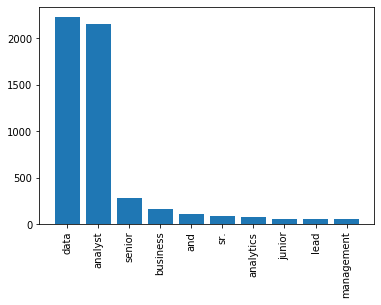

In [24]:
cnt=[]
idex=[]
top10 = tops[0:10]
for i in range(len(top10)):
    cnt.append(top10[i][1])
    idex.append(top10[i][0])
plt.bar(x=idex, height = cnt)
plt.xticks(rotation = 90)

**Data Analyst III means a principal analyst**

**Data Analyst II means senior level**

**Data Analyst I means entry level**

In [25]:
#we will serach for these words and the categories the job title based on the level 
import re
principal_level = re.compile(r'lead|principal|iii|iv',re.I)
senior_level = re.compile(r'senior|sr.|sr|ii',re.I)
junior_level = re.compile(r'junior|jr|jr.|entry|i',re.I)

In [26]:
#https://www.kaggle.com/wewefo/data-job-analysis-visualization-using-nlp-rege

def job_title(row):
    """
    This function will categories the job title based on its level, this is done by using regex pattern matching
    """
    if re.match(principal_level,row['Job Title']):
        return 'Lead'
    if re.match(senior_level,row['Job Title']):
        return 'Senior'
    if re.match(junior_level,row['Job Title']):
        return 'Junior'
    else:
        return "N/A"
    
da['Job Level']=da.apply(job_title,axis=1)

In [27]:
da["Job Level"].value_counts()

N/A       1766
Senior     373
Junior      75
Lead        39
Name: Job Level, dtype: int64

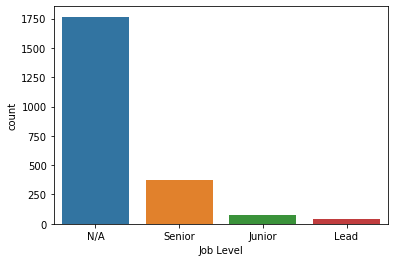

In [28]:
sns.countplot("Job Level", data = da)

**Most of the job-title havent mentioned about the experience level required, which can be problemtic for the person applying for the job**

In [29]:
da.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Job Level
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True,N/A
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),False,N/A
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,False,Senior
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),False,N/A
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True,N/A


## Salary Estimate

In [30]:
da["Salary Estimate"].value_counts()

$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$58K-$93K (Glassdoor est.)    31
                              ..
$47K-$81K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$43K-$77K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
-1                             1
Name: Salary Estimate, Length: 90, dtype: int64

1. we have one salary estimate as -1
2. all the salaries are in dollars so we can remove the $
3. after the salary their is the platform which estimated salary range and hence we need to remove that
4. split the salary into upper range and lower range 

In [31]:
min_sal =[]
max_sal = []
for sal in da["Salary Estimate"]:
    min_sal.append(sal.split("-")[0].lstrip("$").rstrip("K"))
    max_sal.append(sal.split("-")[1].split(" ")[0])
    
#splitting the salary estimate by - which will return a list [$42K,$76K]
#for the first value of the list striping the dollar and K 


In [32]:
da["min_salary"] = min_sal

In [33]:
max_salary=[]
for i in max_sal:
    max_salary.append(i.lstrip("$").rstrip("K")) 

In [34]:
da["maximum-salary"]=max_salary

In [35]:
da.drop("Salary Estimate", axis=1,inplace= True)

In [36]:
da.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Job Level,min_salary,maximum-salary
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True,N/A,37,66
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),False,N/A,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,False,Senior,37,66
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),False,N/A,37,66
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True,N/A,37,66


In [37]:
da['min_salary'].replace("","0",inplace = True)

In [38]:
da['min_salary']=da['min_salary'].astype('int64',copy=True)
da['maximum-salary']= da['maximum-salary'].astype('int64',copy=True)

#converting the minimum and maximum salary into integer type 

In [39]:
da["min_salary"].describe()

count    2253.000000
mean       54.242787
std        19.604393
min         0.000000
25%        41.000000
50%        50.000000
75%        64.000000
max       113.000000
Name: min_salary, dtype: float64

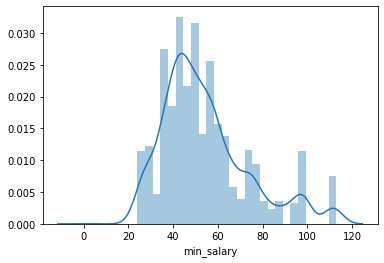

In [40]:
sns.distplot(da["min_salary"])

**The distribution plot looks somewhat like the gaussian distribution except its right side has a long tail**

**Min-salary ranges between 40-60K**

In [41]:
da["maximum-salary"].describe()

count    2253.000000
mean       89.939636
std        29.368984
min         1.000000
25%        70.000000
50%        87.000000
75%       104.000000
max       190.000000
Name: maximum-salary, dtype: float64

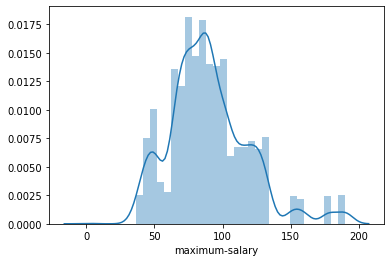

In [42]:
sns.distplot(da["maximum-salary"])

**more jagged lines in the maximum salary, median maximum-salary for a data analyst is between 60-110K**

In [43]:
da['sal_mean']=(da['min_salary']+da['maximum-salary'])/2

In [44]:
da.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Job Level,min_salary,maximum-salary,sal_mean
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True,N/A,37,66,51.5
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),False,N/A,37,66,51.5
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,False,Senior,37,66,51.5
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),False,N/A,37,66,51.5
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True,N/A,37,66,51.5


### More insights on salary

In [45]:
Senior_max = da["maximum-salary"][da["Job Level"]=="Senior"]
Senior_min = da["min_salary"][da["Job Level"]=="Senior"]

Text(0.5, 0, 'Minimum Salary')

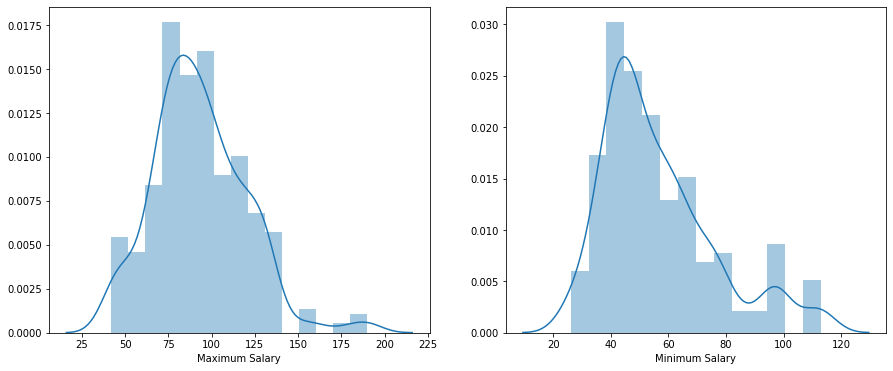

In [46]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(Senior_max)
plt.xlabel("Maximum Salary")
#print(Senior_max.describe())


plt.subplot(1,2,2)
sns.distplot(Senior_min)
plt.xlabel("Minimum Salary")
#print(Senior_min.describe())

#plt.title("Senior")

**For senior Data Analyst maximum salary ranges between 75-115K**

**For senior Data Analyst minimum salary ranges between 40-62K**

In [47]:
Junior_max = da["maximum-salary"][da["Job Level"]=="Junior"]
Junior_min = da["min_salary"][da["Job Level"]=="Junior"]

Text(0.5, 0, 'Minimum Salary')

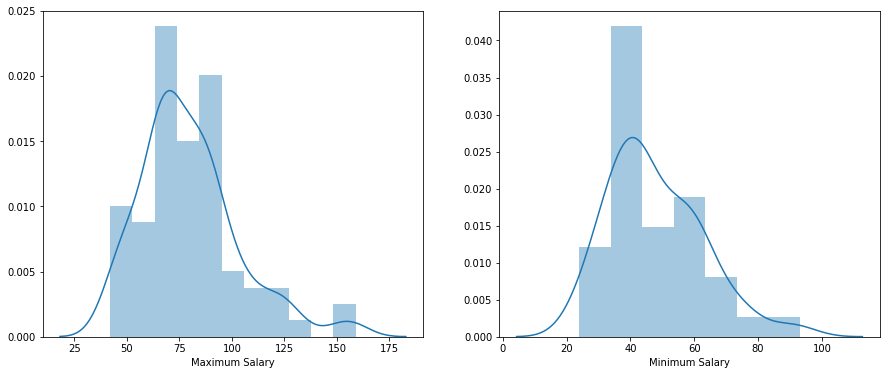

In [48]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(Junior_max)
plt.xlabel("Maximum Salary")
#print(Senior_max.describe())


plt.subplot(1,2,2)
sns.distplot(Junior_min)
plt.xlabel("Minimum Salary")
#print(Senior_min.describe())

#plt.title("Senior")

**For Junior Data Analyst maximum salary ranges between 75-100K**

**For Junior Data Analyst minimum salary ranges between 40-62K**

In [49]:
Lead_max = da["maximum-salary"][da["Job Level"]=="Lead"]
Lead_min = da["min_salary"][da["Job Level"]=="Lead"]

Text(0.5, 0, 'Minimum Salary')

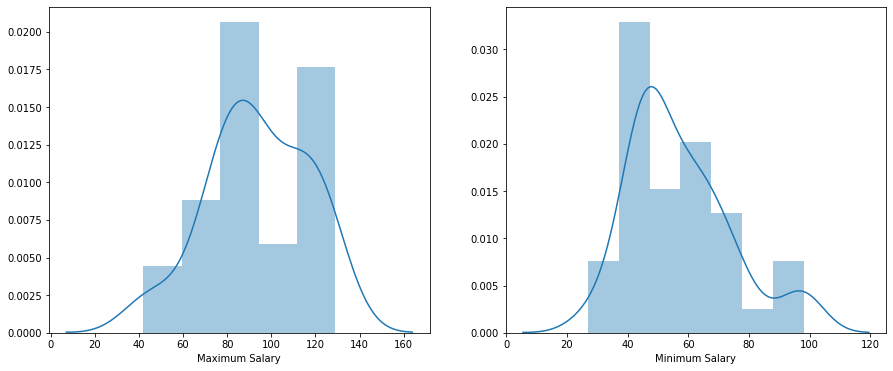

In [50]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(Lead_max)
plt.xlabel("Maximum Salary")
#print(Senior_max.describe())


plt.subplot(1,2,2)
sns.distplot(Lead_min)
plt.xlabel("Minimum Salary")
#print(Senior_min.describe())

#plt.title("Senior")

**For Lead Data Analyst maximum salary ranges between 80-120+K**

**For Lead Data Analyst minimum salary ranges between 40-65K**

#### One thing to note that the minimum salary at every job is nearly the same

## Company Name

**For each company we have also ratings column therefore we need to clean that, partioning on the basis of \n**

In [51]:
da['Company Name'] = da["Company Name"].str.partition("\n")

In [52]:
da.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Job Level,min_salary,maximum-salary,sal_mean
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True,N/A,37,66,51.5
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),False,N/A,37,66,51.5
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,False,Senior,37,66,51.5
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),False,N/A,37,66,51.5
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True,N/A,37,66,51.5


In [53]:
openings =  da["Company Name"][da['Easy Apply']==True].value_counts().sort_values(ascending=False).head(10)

In [54]:
opening_count = openings.values
comp = openings.index

<BarContainer object of 10 artists>

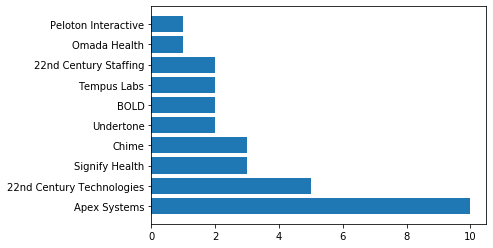

In [55]:
plt.barh(y=comp,width =opening_count)
#plt.xticks(rotation=90)

**Apex Systems has the largest opening for data analyst, followed by 22nd Century**

## Type of Ownership

In [56]:
da["Type of ownership"].value_counts()

Company - Private                 1273
Company - Public                   452
-1                                 163
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Contract                            11
School / School District             9
Private Practice / Firm              9
Self-employed                        2
Franchise                            2
Name: Type of ownership, dtype: int64

In [57]:
da["Type of ownership"].replace("-1","Unknown",inplace= True)

In [58]:
da["Type of ownership"].value_counts()

Company - Private                 1273
Company - Public                   452
Unknown                            179
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Other Organization                  13
Contract                            11
School / School District             9
Private Practice / Firm              9
Self-employed                        2
Franchise                            2
Name: Type of ownership, dtype: int64

In [59]:
ownership =  da["Type of ownership"].value_counts().sort_values(ascending=False).head(15)

In [60]:
ownership

Company - Private                 1273
Company - Public                   452
Unknown                            179
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Other Organization                  13
Contract                            11
Private Practice / Firm              9
School / School District             9
Franchise                            2
Self-employed                        2
Name: Type of ownership, dtype: int64

<BarContainer object of 14 artists>

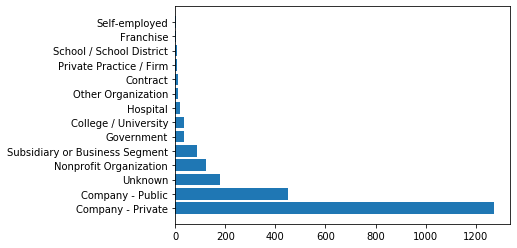

In [61]:
plt.barh(y=ownership.index,width =ownership.values)
#plt.xticks(rotation=90)

**Most companies are either Private sector or Public Sector**

## Job Description

In [62]:
job_des_str=' '.join([x for x in da['Job Description']])
tokens = nltk.word_tokenize(job_des_str)
stopwords = nltk.corpus.stopwords.words('english')


filtered_words_1 = [w.lower() for w in tokens if not w in stopwords]
filtered_words_2 = [w for w in filtered_words_1 if re.match(r'\w',w)] #matching only the alphanumerics in filtered_words
fdist = FreqDist(filtered_words_2) #finding the freq dist
tops=fdist.most_common(100)
pprint.pprint(tops)

[('data', 23230),
 ('experience', 9216),
 ('business', 6890),
 ('work', 5264),
 ('skills', 4363),
 ('analysis', 3778),
 ('team', 3636),
 ('management', 3585),
 ('analyst', 3417),
 ('ability', 3393),
 ('years', 3036),
 ('the', 2898),
 ('information', 2705),
 ('knowledge', 2661),
 ('support', 2646),
 ('job', 2616),
 ('we', 2583),
 ('strong', 2583),
 ('requirements', 2573),
 ('reporting', 2446),
 ('required', 2410),
 ('analytics', 2409),
 ('sql', 2248),
 ('quality', 2222),
 ('working', 2170),
 ('including', 2151),
 ('tools', 2120),
 ('development', 2103),
 ('systems', 2093),
 ('reports', 2082),
 ('new', 1982),
 ('technical', 1924),
 ('solutions', 1845),
 ('degree', 1780),
 ('provide', 1761),
 ('related', 1757),
 ('preferred', 1706),
 ('position', 1678),
 ('company', 1669),
 ('using', 1658),
 ('develop', 1635),
 ('analytical', 1529),
 ('must', 1512),
 ('role', 1483),
 ('processes', 1471),
 ('process', 1470),
 ('project', 1468),
 ('technology', 1452),
 ('this', 1447),
 ('health', 1435),
 ('

In [63]:
#https://www.kaggle.com/wewefo/data-job-analysis-visualization-using-nlp-rege#2.-FEATURE-ENGINEERING
pat_p_r=re.compile(r'python| R ',re.I)
pat_tab=re.compile(r'powerbi|tableau',re.I)
pat_vis=re.compile(r'visualization',re.I)
pat_c=re.compile(r' C |C#')
pat_exc=re.compile(r'excel',re.I)
pat_sql=re.compile(r'sql|mysql|database',re.I)
pat_had=re.compile(r'hadoop|hive|spark',re.I)
pat_stat=re.compile(r'statistics|statistical',re.I)
pat_code=re.compile(r'coding|programming',re.I)

In [64]:
def job_skill(row):
    if re.search(pat_p_r,row['Job Description']):
        return 'Python/R'
    if re.search(pat_tab,row['Job Description']):
        return 'PowerBi/Tableau'
    if re.search(pat_vis,row['Job Description']):
        return 'Visualization'
    if re.search(pat_c,row['Job Description']):
        return 'C/C#'
    if re.search(pat_sql,row['Job Description']):
        return 'SQL/MySQL'
    if re.search(pat_had,row['Job Description']):
        return 'Hadoop/Hive/Spark'
    if re.search(pat_stat,row['Job Description']):
        return 'Statistics'
    if re.search(pat_code,row['Job Description']):
        return 'Coding'
    return None
    
da['Job Skill']=da.apply(job_skill,axis=1)


In [65]:
js = da["Job Skill"].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

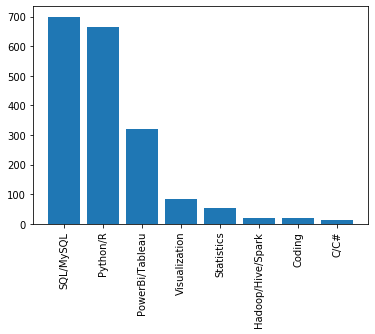

In [66]:
plt.bar(x= js.index,height=js.values)
plt.xticks(rotation = 90)

**THere is a high demand of dataases and a programing language(Python/R) for Data Analyst** so a candidate must hone these skills

In [67]:
da.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Job Level,min_salary,maximum-salary,sal_mean,Job Skill
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True,N/A,37,66,51.5,Python/R
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),False,N/A,37,66,51.5,SQL/MySQL
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,False,Senior,37,66,51.5,Python/R
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),False,N/A,37,66,51.5,PowerBi/Tableau
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True,N/A,37,66,51.5,Python/R


## Employee Size

In [68]:
da["Size"].value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: int64

In [69]:
x = da["Size"][0]

In [70]:
m = re.sub("\semployees","",x)
print(m)

201 to 500


In [71]:
da["Employe Size"] = [re.sub("\semployees","",x) for x in da["Size"]]

In [72]:
da["Employe Size"]

0         201 to 500
1             10000+
2       1001 to 5000
3         201 to 500
4        501 to 1000
            ...     
2248       51 to 200
2249          10000+
2250              -1
2251      201 to 500
2252          10000+
Name: Employe Size, Length: 2253, dtype: object

In [73]:
da["Employe Size"].value_counts()

51 to 200        421
10000+           375
1001 to 5000     348
1 to 50          347
201 to 500       249
501 to 1000      211
-1               163
5001 to 10000     97
Unknown           42
Name: Employe Size, dtype: int64

**adding -1 and unknown to same** 

In [74]:
da.drop("Size",axis = 1,inplace =True)

In [75]:
da["Employe Size"] = [x.replace("-1","Unknown") for x in  da["Employe Size"]]

In [76]:
x = da["Employe Size"].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

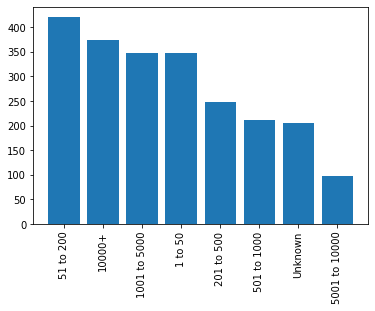

In [77]:
plt.bar(x = x.index,height =x.values)
plt.xticks(rotation = 90)

### Revenue

In [78]:
da["Revenue"].value_counts()

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
-1                                  163
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

In [79]:
m = da["Revenue"][0]

In [80]:
m

'$100 to $500 million (USD)'

In [81]:
z = re.sub("\s[bm]\w*\s.*","",m)
print(z)

#\s represents space 
#[bm] it starts with either b(billion) or m (million)
#\w any alphanumeric word 
#* represents presence of 0 or more times 
#\s again s 
# then .* anything after that 

$100 to $500


In [82]:
da["Revenue"] = [re.sub("\s[bm]\w*\s.*","",x) for x in da["Revenue"]]

In [83]:
da["Revenue"].value_counts()

Unknown / Non-Applicable    615
$100 to $500                218
$50 to $100                 199
$10+                        189
-1                          163
$10 to $25                  132
$2 to $5                    129
$5 to $10                   128
$1 to $5                    111
$25 to $50                  110
Less than $1                 93
$1 to $2                     87
$500                         79
Name: Revenue, dtype: int64

In [84]:
da["Revenue"] = [x.replace("-1","Unknown") for x in  da["Revenue"]]

In [85]:
x = da["Revenue"].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

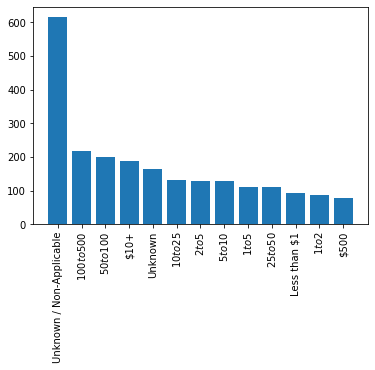

In [86]:
plt.bar(x = x.index,height =x.values)
plt.xticks(rotation = 90)

In [87]:
da.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Job Level,min_salary,maximum-salary,sal_mean,Job Skill,Employe Size
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500,True,N/A,37,66,51.5,Python/R,201 to 500
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5,False,N/A,37,66,51.5,SQL/MySQL,10000+
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,False,Senior,37,66,51.5,Python/R,1001 to 5000
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100,False,N/A,37,66,51.5,PowerBi/Tableau,201 to 500
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500,True,N/A,37,66,51.5,Python/R,501 to 1000


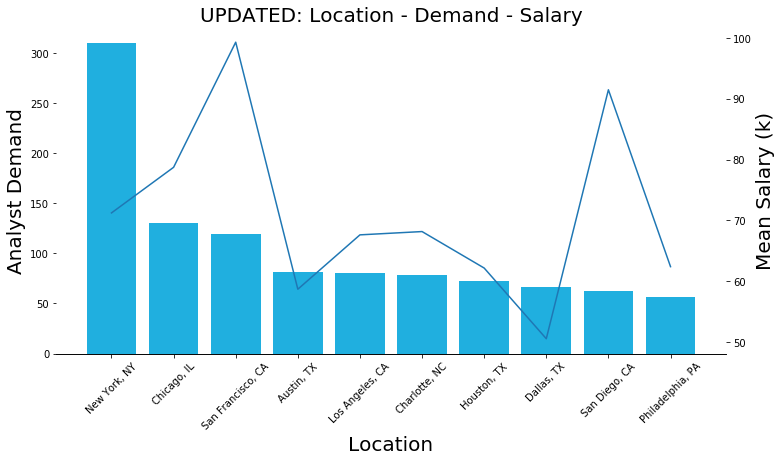

In [88]:
plot_data = da.groupby('Location', as_index=False).agg({'sal_mean':'mean', 'Rating':'count'}).sort_values('Rating', 0, False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Location', y='Rating', data=plot_data,color='deepskyblue')
ax=plt.gca()
ax.tick_params(labelsize=10,rotation=45,axis='x') 
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('Location',fontsize=20)
ax2 = ax.twinx() 

ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['left'].set_color('none')

ax.set_ylabel('Analyst Demand',fontsize=20)
sns.lineplot(data=plot_data, x='Location',y='sal_mean',ax=ax2, sort=False)
ax2.set_ylabel('Mean Salary (k)',fontsize=20)

plt.title('UPDATED: Location - Demand - Salary',fontsize=20)
plt.show()

**San Francisco, CA offeres the highest salary as compared to others but the demand for the data analyst is highest for New York NY**

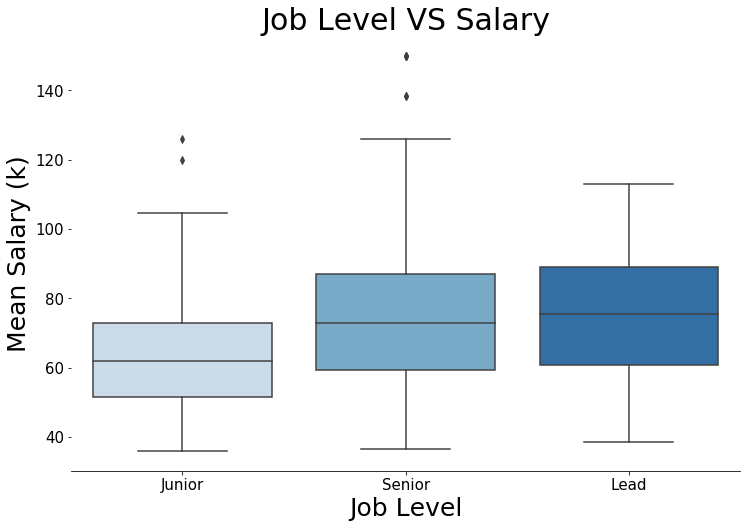

In [89]:
plt.figure(figsize=(12,8))
sns.boxplot(data=da,x='Job Level',y='sal_mean',order=['Junior','Senior','Lead'],palette='Blues')
ax=plt.gca() #gca = get current axis used to reference the current axis
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_ylabel('Mean Salary (k)',fontsize=25)
ax.set_xlabel('Job Level',fontsize=25)
ax.tick_params(labelsize=15) 
plt.title('Job Level VS Salary',fontsize=30)
plt.show()

**Senior and Lead have nearly the same salaries, so we can say that at some point salary doesn't grows to much which seams to logical, so candidate can take the role of senior or lead both have nearly same salary**

In [90]:
comp_sal = da.groupby("Company Name")["sal_mean"].mean().sort_values(ascending = False).head(50)

In [91]:
comp_sal

Company Name
Xcutives.com Inc                         150.00
OSI Engineering                          150.00
Zipongo                                  150.00
Alteryx                                  150.00
Cognoa                                   150.00
Tesla Motors                             150.00
Bandai Namco Entertainment America       150.00
Ursus                                    150.00
Joomag, Inc.                             150.00
Risk Management Solutions (RMS)          150.00
Moveworks                                150.00
Enjoy                                    150.00
Nuro                                     150.00
Iconma, L.L.C.                           150.00
Logic Planet                             150.00
Netflix                                  150.00
LeanData                                 150.00
Albany Charter School Network            138.50
Veem                                     138.50
Parsoft LLC                              138.50
Applicantz, Inc.           

In [92]:
da.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Founded', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'Easy Apply', 'Job Level', 'min_salary', 'maximum-salary',
       'sal_mean', 'Job Skill', 'Employe Size'],
      dtype='object')

In [93]:
def job_type(row):
    if row['Job Title'].find('Business')!=-1:
        return 'Business'
    if row['Job Title'].find('Healthcare')!=-1:
        return 'healthcare'
    if row['Job Title'].find('quality')!=-1:
        return 'quality'
    if row['Job Title'].find('Reporting')!=-1:
        return 'reporting'
    if row['Job Title'].find('Financial')!=-1:
        return 'financial'
    if row['Job Title'].find('Security')!=-1:
        return 'security'
    if row['Job Title'].find('Product')!=-1:
        return 'product'
    if row['Job Title'].find('Marketing')!=-1:
        return 'marketing'

In [94]:
da['Job Type']=da.apply(job_type,axis=1)

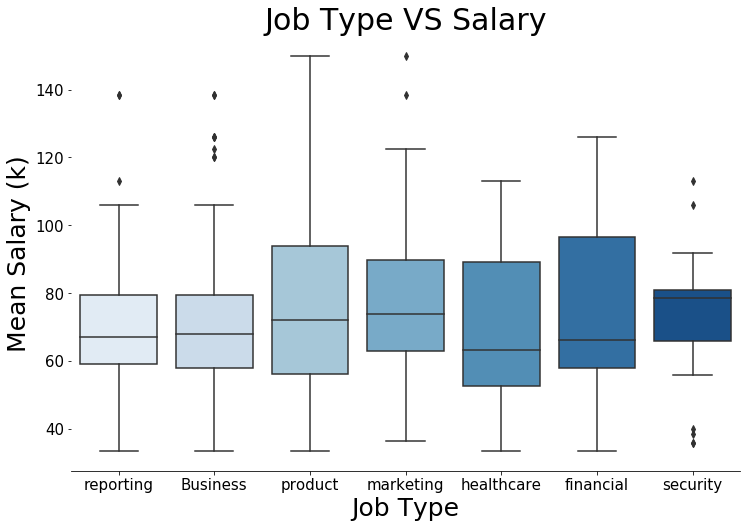

In [95]:
plt.figure(figsize=(12,8))
sns.boxplot(data=da,x='Job Type',y='sal_mean',palette='Blues')
ax=plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_ylabel('Mean Salary (k)',fontsize=25)
ax.set_xlabel('Job Type',fontsize=25)
ax.tick_params(labelsize=15) 
plt.title('Job Type VS Salary',fontsize=30)
plt.show()

**Mean salary is nearly the same except for security whose median salary is very close to Q3 which could be becuase of the outliers present**

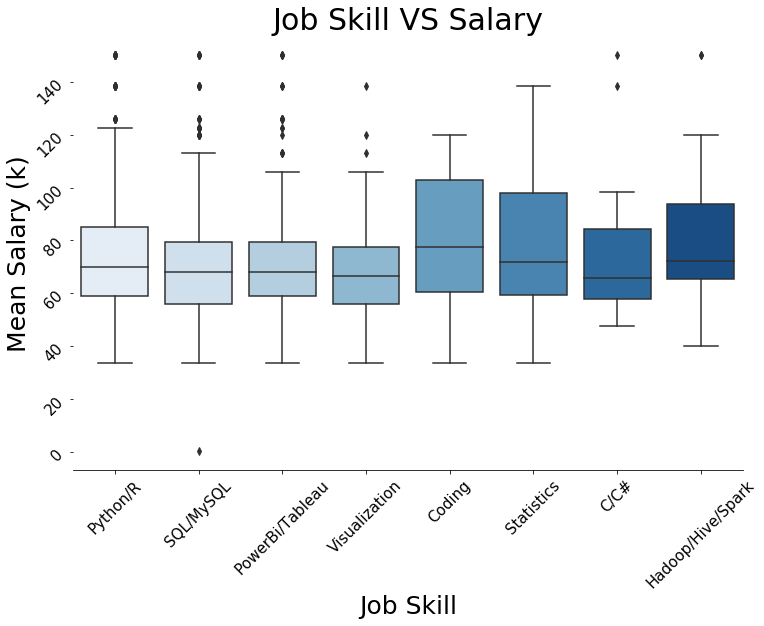

In [96]:
plt.figure(figsize=(12,8))
sns.boxplot(data=da,x='Job Skill',y='sal_mean',palette='Blues')
ax=plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_ylabel('Mean Salary (k)',fontsize=25)
ax.set_xlabel('Job Skill',fontsize=25)
ax.tick_params(labelsize=15,rotation=45) 
plt.title('Job Skill VS Salary',fontsize=30)
plt.show()

**Large number of outliers are present for nearly all the job-skill, so there can be scope for a person to earn more than what the average candidate is earning at a particular jobskill**

**Coding has the highest IQR which seems logical**

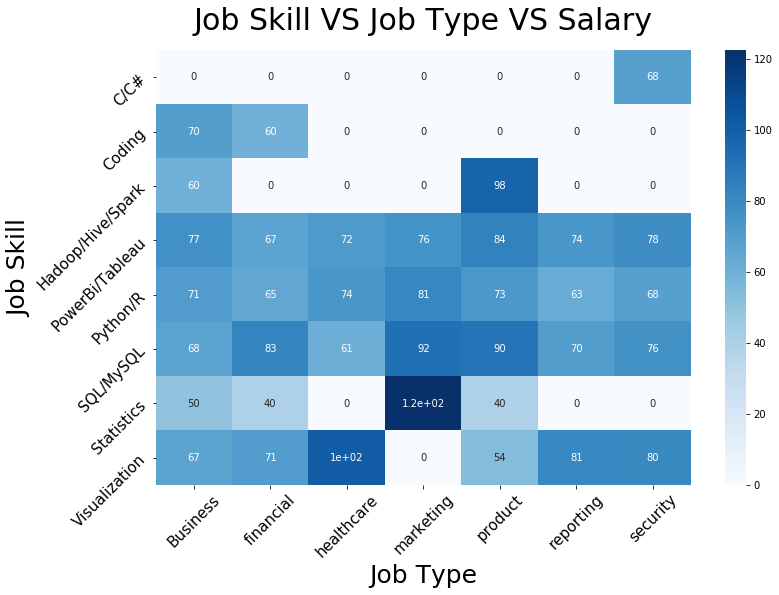

In [97]:
plt.figure(figsize=(12,8))
sns.heatmap(da.groupby(by=['Job Skill','Job Type'])['sal_mean'].mean().unstack().fillna(0),cmap='Blues',annot=True)
ax=plt.gca()
ax.set_ylabel('Job Skill',fontsize=25)
ax.set_xlabel('Job Type',fontsize=25)
ax.tick_params(labelsize=15,rotation=45) 
plt.title('Job Skill VS Job Type VS Salary',fontsize=30,pad=20)
plt.show()


#grouping the job-skill and jobtype on the basis of mean salary which return as multi-index dataframe and then to deal with the multindex we used unstack and fill the na values of 0abs
#annot = True prints the value inside the heatmap 